In [1]:
#importing necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Loading the dataset
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')


In [4]:
#shape of dataset
train_data.shape,test_data.shape

((4209, 378), (4209, 377))

In [5]:
train_data.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0


## Investigating the target variable

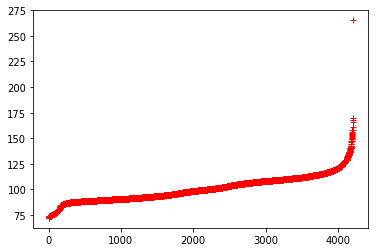

In [107]:
plt.plot(np.sort(train_data.y),'r+')

**Observation : As you can see there are some outlier present who has higher value than 155.**

(array([ 22.,  49.,  46.,  23.,  14.,  13.,  37., 141., 404., 427., 314.,
        229., 167., 220., 224., 148., 142., 219., 279., 266., 207., 152.,
        110.,  81.,  60.,  44.,  25.,  24.,  17.,  24.,   7.,  13.,  11.,
          9.,   6.,   8.,   3.,   2.,   3.,   2.,   4.,   1.,   4.,   1.,
          2.,   1.,   0.,   0.,   1.,   1.,   1.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.]),
 array([ 72.11  ,  74.0421,  75.9742,  77.9063,  79.8384,  81.7705,
         83.7026,  85.6347,  87.5668,  89.4989,  91.431 ,  93.3631,
         95.2952,  97.2273,  99.1594, 101.0915, 103.0236, 104.9557,
        106.8878, 108.8199, 110.752 , 112.6841, 114.6162, 116.5483,
        118.4804, 120.4125, 122.3446, 124.2767

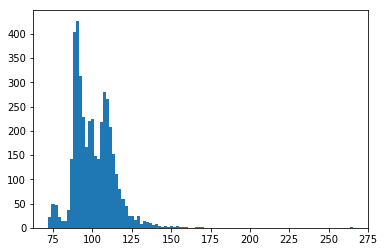

In [6]:
plt.hist(np.sort(train_data.y),bins = 100)

```
Observation : The majority of test durations are between 90 and 100 seconds.
There are peaks in testing times around 97–98 seconds and near 108 seconds.
The testing times are bi-modal, with two distinct peaks.
```

### Dropping some columns which have same value for all rows

In [13]:
#Examining all binary columns
cols = train_data.select_dtypes([np.number]).columns
std = train_data[cols].std()
#There are some columns which have same value for all rows
cols_to_drop = std[std==0].index
print('There are',len(cols_to_drop),'columns have same value for all rows')
train = train_data.drop(cols_to_drop,axis = 1)
test = test_data.drop(cols_to_drop,axis = 1)

There are 12 columns have same value for all rows


In [14]:
train.shape,test.shape

((4209, 366), (4209, 365))

In [15]:
features = list(train_data.columns)

In [16]:
temp = features[2:10]
temp

['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8']

In [17]:
train.X0 = train.X0.astype('category').cat.codes
train.X1 = train.X1.astype('category').cat.codes
train.X2 = train.X2.astype('category').cat.codes
train.X3 = train.X3.astype('category').cat.codes
train.X4 = train.X4.astype('category').cat.codes
train.X5 = train.X5.astype('category').cat.codes
train.X6 = train.X6.astype('category').cat.codes
train.X8 = train.X8.astype('category').cat.codes

In [18]:
test.X0 = test_data.X0.astype('category').cat.codes
test.X1 = test_data.X1.astype('category').cat.codes
test.X2 = test_data.X2.astype('category').cat.codes
test.X3 = test_data.X3.astype('category').cat.codes
test.X4 = test_data.X4.astype('category').cat.codes
test.X5 = test_data.X5.astype('category').cat.codes
test.X6 = test_data.X6.astype('category').cat.codes
test.X8 = test_data.X8.astype('category').cat.codes


In [19]:
test.head()

,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,1,21,23,34,5,3,26,0,22,0,...,0,0,0,1,0,0,0,0,0,0
1,2,42,3,8,0,3,9,6,24,0,...,0,0,1,0,0,0,0,0,0,0
2,3,21,23,17,5,3,0,9,9,0,...,0,0,0,1,0,0,0,0,0,0
3,4,21,13,34,5,3,31,11,13,0,...,0,0,0,1,0,0,0,0,0,0
4,5,45,20,17,2,3,30,8,12,0,...,1,0,0,0,0,0,0,0,0,0


### Preparing training dataset for classifier

In [22]:
#train = train[train.y < 170]
X_train = train.drop('y', axis = 1)
y_train = train.y
X_test = test

In [23]:
train.shape,X_train.shape,y_train.shape

((4209, 366), (4209, 365), (4209,))

In [24]:
X_test = test

In [25]:
#Scaling dataset
from sklearn.preprocessing import StandardScaler
X_train_std = StandardScaler().fit_transform(X_train)
X_test_std = StandardScaler().fit_transform(X_test)

### Dimensionality Reduction with PCA 

In [42]:
from sklearn.decomposition import PCA

In [43]:
pca = PCA(0.95)

In [44]:
pca.fit(X_train_std)

PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

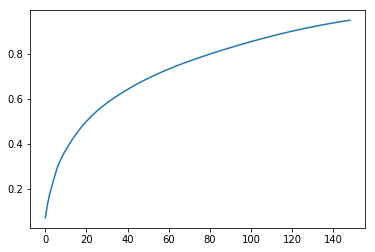

In [45]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))

In [46]:
len(pca.explained_variance_ratio_)

149

In [47]:
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

In [48]:
import xgboost as xgb

In [49]:
%%time
params = {"objective": "reg:linear",
          "eta": 0.0025,
          "n_trees" : 600,
          "max_depth": 5,
          "silent": 1,
          "subsample": 0.85,
          "seed": 1,
          "eval_metric" : 'rmse',
          "base_score" : np.mean(y_train)}
dtrain = xgb.DMatrix(X_train_pca,y_train)
dtest = xgb.DMatrix(X_test_pca)
n_boosting_rounds = 1500
model = xgb.train(params,dtrain,num_boost_round=n_boosting_rounds)

CPU times: user 2min 44s, sys: 384 ms, total: 2min 45s
Wall time: 43.4 s


In [50]:
test_prob = model.predict(dtest)

In [51]:
submit = pd.DataFrame({
    'ID' : test_data.ID,
    'y' : test_prob
    })
submit.to_csv('mercedez.csv', index = False)

### Dimensionality Reduction with SVD 

In [60]:
from sklearn.decomposition import TruncatedSVD
tsvd_ex = TruncatedSVD(n_components = X_train_std.shape[1]-1, random_state=42)

In [61]:
tsvd_ex.fit(X_train_std)

TruncatedSVD(algorithm='randomized', n_components=364, n_iter=5,
       random_state=42, tol=0.0)

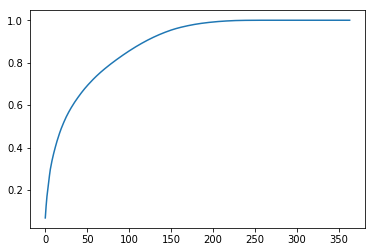

In [62]:
plt.plot(np.cumsum(tsvd_ex.explained_variance_ratio_))

In [63]:
from sklearn.decomposition import TruncatedSVD
tsvd = TruncatedSVD(n_components = 155, random_state=42)
tsvd_results_train = tsvd.fit_transform(X_train_std)
tsvd_results_test = tsvd.transform(X_test_std)

In [65]:
X_train_pca = pd.DataFrame(X_train_pca)
X_test_pca = pd.DataFrame(X_test_pca)

In [66]:
n_comp = 155
for i in range(1, n_comp + 1):
    X_train_pca['tsvd_' + str(i)] = tsvd_results_train[:, i - 1]
    X_test_pca['tsvd_' + str(i)] = tsvd_results_test[:, i - 1]

In [67]:
%%time
params = {"objective": "reg:linear",
          "eta": 0.0045,
          "n_trees" : 520,
          "max_depth": 4,
          "silent": 1,
          "subsample": 0.85,
          "seed": 1,
          "eval_metric" : 'rmse',
          "base_score" : np.mean(y_train)}
dtrain = xgb.DMatrix(tsvd_results_train,y_train)
dtest = xgb.DMatrix(tsvd_results_test)
n_boosting_rounds = 1500
model = xgb.train(params,dtrain,num_boost_round=n_boosting_rounds)

CPU times: user 2min 10s, sys: 176 ms, total: 2min 10s
Wall time: 33.5 s


In [68]:
test_prob = model.predict(dtest)

In [69]:
submit = pd.DataFrame({
    'ID' : test_data.ID,
    'y' : test_prob
    })
submit.to_csv('mercedez.csv', index = False)